# 探索[Armenian Online Job Postings](https://www.kaggle.com/udacity/armenian-online-job-postings)

结论：
1. 紧急招聘比有计划的招聘多
2. 存在金二银三、金九银十现象
3. 04年到15年，除08年金融危机外，其它年份IT人才照片都在逐年上升

In [83]:
import zipfile,copy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
with zipfile.ZipFile('E:\\MySQL_data\\armenian-online-job-postings.zip','r') as myzip:
    myzip.extractall()

In [84]:
jobpost = pd.read_csv('E:\MySQL_data\\online-job-postings.csv')
jobclean = copy.copy(jobpost)

asap_list = ['Immediately','As soon as possible','Upon hiring','Immediate',
             'Immediate employment','As soon as possible','Immediate job opportunity',
             'Immediate employment',
             '"Immediate employment, after passing the interview."',
            'As soon as possible.']

for i in asap_list:
    jobclean['StartDate'].replace(i,'ASAP',inplace=True)

In [89]:
jobsd_asap = jobclean['StartDate'].value_counts()['ASAP']
jobsd_asap

6779

In [88]:
jobsd_no_asap = jobclean['StartDate'].count() - jobsdvc
jobsd_no_asap

2896

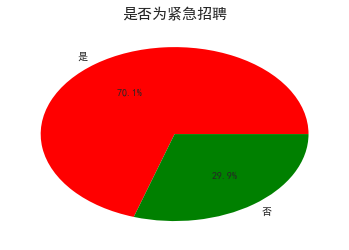

In [107]:
sns.set_style('whitegrid')
plt.rcParams['font.sans-serif'] = ['Simhei']
plt.title('是否为紧急招聘',fontproperties="SimHei",fontsize=15)
labels = ['是','否']
x = [jobsd_asap,jobsd_no_asap]
plt.pie(x=x,labels=labels,colors=['r','g'],autopct='% .1f% %')

plt.savefig('紧急招聘情况.jpg',dpi=800)

In [119]:
yearly_job_totals = jobclean.groupby('Year').count()['IT']
yearly_job_totals

Year
2004     875
2005    1138
2006    1116
2007    1538
2008    1785
2009    1191
2010    1511
2011    1697
2012    2149
2013    2009
2014    1983
2015    2009
Name: IT, dtype: int64

In [116]:
yearly_data_job_totals = jobclean.groupby('Year').sum()['IT']
yearly_data_job_totals

Year
2004    145.0
2005    208.0
2006    225.0
2007    317.0
2008    334.0
2009    155.0
2010    224.0
2011    327.0
2012    473.0
2013    378.0
2014    463.0
2015    510.0
Name: IT, dtype: float64

Text(2006,500,'IT人占比')

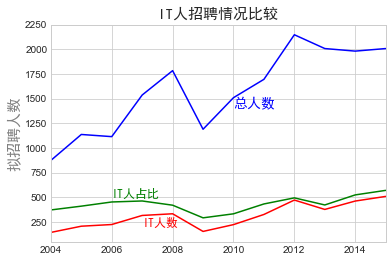

In [118]:
yearly_percentage_data_jobs = yearly_data_job_totals / yearly_job_totals

sns.set_style('whitegrid')
plt.xlim(2004,2015)
plt.title('IT人招聘情况比较',fontproperties="SimHei",fontsize=15)
plt.ylabel('拟招聘人数',fontproperties='Simhei',fontsize=15,color='grey')


plt.plot(list(yearly_percentage_data_jobs.index),list(yearly_job_totals),color='blue')
plt.plot(list(yearly_percentage_data_jobs.index),list(yearly_data_job_totals),color='r')
plt.plot(list(yearly_percentage_data_jobs.index),yearly_percentage_data_jobs*2250,
         color='g')

plt.text(2010,1400,'总人数',fontproperties='SimHei',fontsize=14,color='blue')
plt.text(2007,200,'IT人数',fontproperties='SimHei',fontsize=12,color='r')
plt.text(2006,500,'IT人占比',fontproperties='SimHei',fontsize=12,color='g')

#plt.savefig('IT人招聘情况比较.jpg',dpi=800)

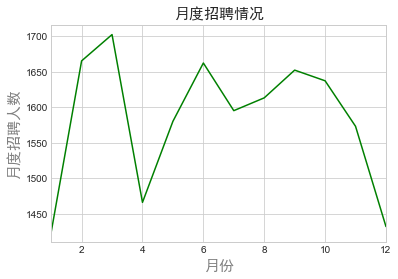

In [108]:
month_job_total = jobclean.groupby(['Month']).count()['jobpost']
date_month = np.arange(1,13)

sns.set_style('whitegrid')
plt.xlim(1,12)
plt.title('月度招聘情况',fontproperties="SimHei",fontsize=15)
plt.ylabel('月度招聘人数',fontproperties='Simhei',fontsize=15,color='grey')
plt.xlabel('月份',fontproperties='Simhei',fontsize=15,color='grey')
plt.plot(list(date_month),list(month_job_total),color='green')

#plt.savefig('月度招聘人数情况.jpg',dpi=800)

In [3]:
import IPython.core.display as di
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)  